# 练习6：支持向量机

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.optimize as opt #fmin_cg to train the linear regression
import pandas as pd
from sklearn import svm #SVM software

## SVM
### 查看数据

In [91]:
data1 = sio.loadmat("./data/ex6data1.mat")
X1 = data1['X']
y1 = data1['y']
X1.shape, y1.shape

((51, 2), (51, 1))

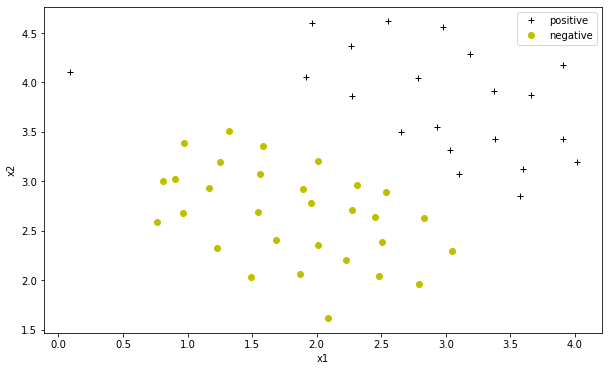

In [92]:
# 区分出正负样本
positive1 = np.array([X1[i] for i in range(X1.shape[0]) if y1[i]==1]) #正样本
negative1 = np.array([X1[i] for i in range(X1.shape[0]) if y1[i]==0]) #负样本

plt.figure(figsize=(10,6))
plt.plot(positive1[:,0], positive1[:,1], 'k+', label='positive')
plt.plot(negative1[:,0], negative1[:,1], 'yo', label='negative')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

## 使用sklearn工具包

In [93]:
linear_svm = svm.SVC(C=1, kernel='linear')
linear_svm.fit( X1, y1.flatten() )
linear_svm.score(X1, y1.ravel())

0.9803921568627451

In [94]:
# 绘制决策边界
def darw_data_and_boundary(svm, x_plt, y_plt,positive,negative,C):
    z_plt = np.zeros((len(x_plt),len(y_plt)))
    for i in range(len(x_plt)):
        for j in range(len(y_plt)):
            xp = np.array([x_plt[i],y_plt[j]]).reshape(1,2)
            z_plt[i][j] = svm.predict(xp)
    z_plt = z_plt.transpose()

    plt.figure(figsize=(10,6))
    plt.plot(positive[:,0], positive[:,1], 'k+', label='positive')
    plt.plot(negative[:,0], negative[:,1], 'yo', label='negative')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    u, v = np.meshgrid( x_plt, y_plt )
    mycontour = plt.contour( u, v, z_plt, [0])
    plt.title("Decision Boundary- C=%.2f" %C)

<ipython-input-94-8899aae28fd3>:17: UserWarning: No contour levels were found within the data range.
  mycontour = plt.contour( u, v, z_plt, [0])


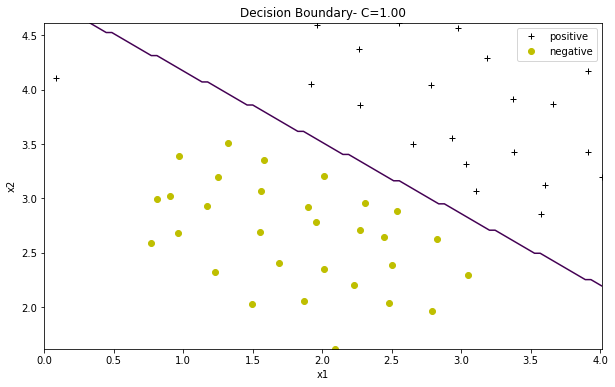

In [96]:
x_plt = np.linspace(0,np.max(X1[:,0]),100)
y_plt = np.linspace(np.min(X1[:,1]),np.max(X1[:,1]),100)
# C=1
darw_data_and_boundary(linear_svm, x_plt, y_plt, positive1,negative1,C=1)

<ipython-input-94-8899aae28fd3>:17: UserWarning: No contour levels were found within the data range.
  mycontour = plt.contour( u, v, z_plt, [0])


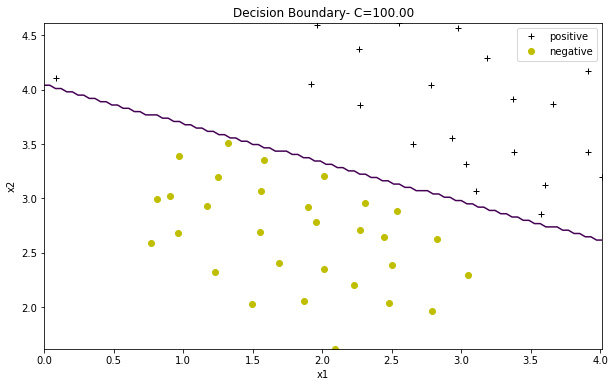

In [97]:
# C=100
linear_svm_0 = svm.SVC(C=100, kernel='linear')
linear_svm_0.fit( X1, y1.flatten() )
linear_svm_0.score(X1, y1.ravel())
darw_data_and_boundary(linear_svm_0, x_plt, y_plt, positive1,negative1 ,C=100)

## 高斯核的SVM

### 数据集2

In [75]:
data2 = sio.loadmat("./data/ex6data2.mat")
data2
X2 = data2['X']
y2 = data2['y']
X2.shape, y2.shape

((863, 2), (863, 1))

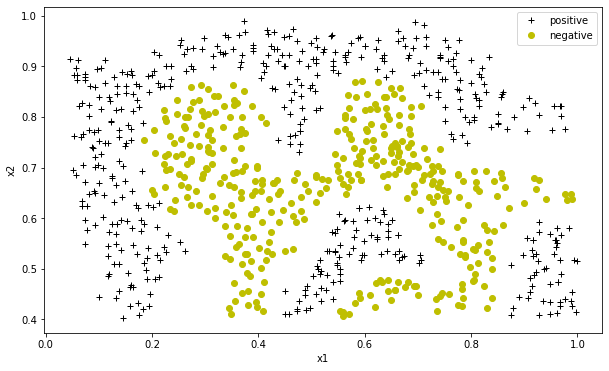

In [98]:
# 区分出正负样本
positive2 = np.array([X2[i] for i in range(X2.shape[0]) if y2[i]==1]) #正样本
negative2 = np.array([X2[i] for i in range(X2.shape[0]) if y2[i]==0]) #负样本

plt.figure(figsize=(10,6))
plt.plot(positive2[:,0], positive2[:,1], 'k+', label='positive')
plt.plot(negative2[:,0], negative2[:,1], 'yo', label='negative')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

<ipython-input-94-8899aae28fd3>:17: UserWarning: No contour levels were found within the data range.
  mycontour = plt.contour( u, v, z_plt, [0])


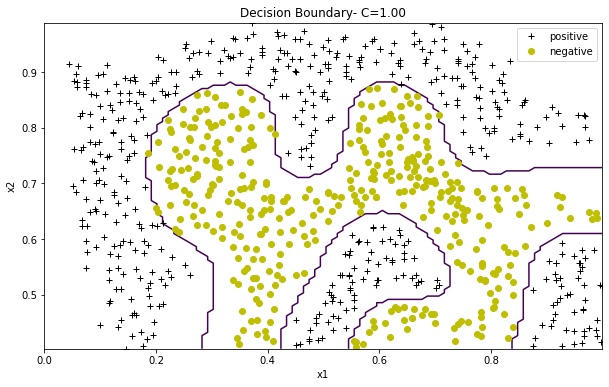

In [114]:
x_plt = np.linspace(0,np.max(X2[:,0]),100)
y_plt = np.linspace(np.min(X2[:,1]),np.max(X2[:,1]),100)
# C=1
gamma = np.power(0.1,-2.)
Gaussian_svm = svm.SVC(C=1, kernel='rbf',gamma=gamma)
Gaussian_svm.fit( X2, y2.ravel() )
Gaussian_svm.score(X2, y2.ravel())
darw_data_and_boundary(Gaussian_svm, x_plt, y_plt, positive2,negative2 ,C=1)

# darw_data_and_boundary(linear_svm, x_plt, y_plt, positive2,negative2,C=1)

### 数据集3

In [140]:
data3 = sio.loadmat("./data/ex6data3.mat")
X3 = data3['X']
y3 = data3['y']
Xval = data3['Xval']
yval = data3['yval']
X3.shape, y3.shape,Xval.shape, yval.shape

((211, 2), (211, 1), (200, 2), (200, 1))

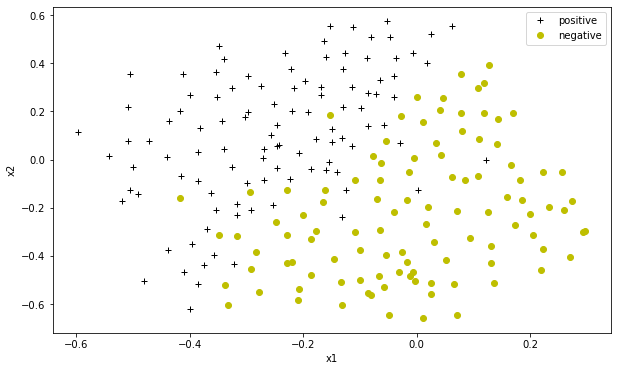

In [141]:
# 区分出正负样本
positive3 = np.array([X3[i] for i in range(X3.shape[0]) if y3[i]==1]) #正样本
negative3 = np.array([X3[i] for i in range(X3.shape[0]) if y3[i]==0]) #负样本

plt.figure(figsize=(10,6))
plt.plot(positive3[:,0], positive3[:,1], 'k+', label='positive')
plt.plot(negative3[:,0], negative3[:,1], 'yo', label='negative')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

### 训练找出最佳的 C 和 gamma

In [142]:
C_values = [0.01, 0.03, 0.1, 0.3, 1., 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1., 3, 10, 30, 100]
best_score = 0.
best_C = 0.
best_gamma = 0.
for c in C_values:
    for gamma in gamma_values:
#         gamma =  np.power(gamma,-2.)
        gaus_svm = svm.SVC(C=c, kernel='rbf', gamma=gamma)
        gaus_svm.fit(X3, y3.ravel())
        score = gaus_svm.score(Xval, yval)
        if score > best_score:
            best_score = score
            best_C = c
            best_gamma=gamma

In [143]:
best_C,best_gamma,best_score

(0.3, 100, 0.965)

<ipython-input-94-8899aae28fd3>:17: UserWarning: No contour levels were found within the data range.
  mycontour = plt.contour( u, v, z_plt, [0])


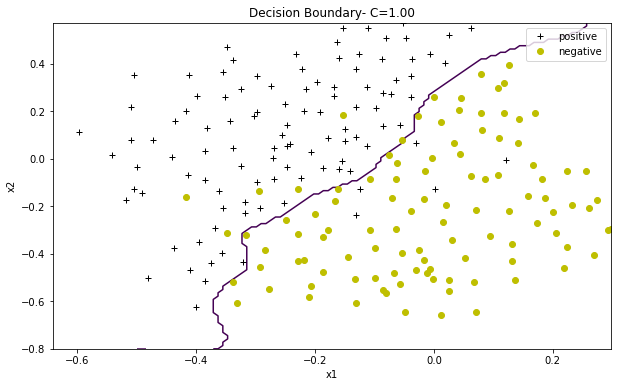

In [149]:
x_plt = np.linspace(-0.5,np.max(X3[:,0]),100)
y_plt = np.linspace(-0.8,np.max(X3[:,1]),100)
# C=1
# gamma = np.power(0.1,-2.)
Gaussian_svm = svm.SVC(C=best_C, kernel='rbf', gamma=best_gamma)
Gaussian_svm.fit(X3, y3.ravel())
darw_data_and_boundary(Gaussian_svm, x_plt, y_plt, positive3, negative3 ,C=1)

## Spam Classification 垃圾邮件分类

### 使用已经标记好的训练集和测试集

In [151]:
datatrain = sio.loadmat('./data/spamTrain.mat')
datatest = sio.loadmat('./data/spamTest.mat')

X = datatrain['X']
y = datatrain['y']
Xtest = datatest['Xtest']
ytest = datatest['ytest']
X.shape, y.shape, Xtest.shape, ytest.shape

((4000, 1899), (4000, 1), (1000, 1899), (1000, 1))

In [152]:
linear_svm = svm.SVC(C=0.1, kernel='linear')
# Now we fit the SVM to our X matrix, given the labels y
linear_svm.fit(X, y.flatten())

0.989

In [153]:
train_score = linear_svm.score(X, y.flatten())
test_score = linear_svm.score(Xtest, ytest.flatten())
train_score,test_score

(0.99825, 0.989)

In [154]:
gaus_svm = svm.SVC(C=1, kernel='rbf')
gaus_svm.fit(X, y.flatten())
train_score1 = gaus_svm.score(X, y.flatten())
test_score1 = gaus_svm.score(Xtest, ytest.flatten())
train_score1,test_score1

(0.99325, 0.987)